In [1]:
import pandas as pd
import preprocessor as p
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install tweet-preprocessor

  Using cached tweet_preprocessor-0.6.0-py3-none-any.whl (27 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install Sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install tweet-preprocessor

# Load Data

In [2]:
data_tweet = pd.read_excel('Data buat ML test 1.xlsx')
data_tweet

,username,text,label
0,Gorajuara,One Piece Chapter 1054 : Teach Dapatkan Buah I...,Positif
1,arifbsantoso,@TaliUdeng Anies tu siapa sih? Kok nama itu se...,Positif
2,BengkeltanahONE,@Thalomoan1 @Dhimaz_Ariya @prabowo Paloh akan ...,Negatif
3,dnayza1212,@zarazettirazr @aniesbaswedan bisa dilihat kin...,Positif
4,barnel_tito,@tanyaAzka @Bavris @ekowboy2 Lagi halu dia 😂😂 ...,Negatif
...,...,...,...
400,sweetcigarrate,Kominfo gaje bgt asw gajelas pen gw hap tak ku...,negatif
401,rinerineboo,Ini kominfo beneran mau blokir2 ???,positif
402,matchaireng,kominfo bikin peduli lindungi aja jelek bgt ht...,negatif
403,diabetusboss,kominfo apaan si gajelas bgt ngentot,negatif


In [34]:
data_tweet["text"].tolist()

['One Piece Chapter 1054 : Teach Dapatkan Buah Iblis Kaido dan Big Mom, Bajak Laut Kurohige Tidak Terkalahkan? #ONEPIECE1054SPOILERS #ONEPIECE #ONEPIECE1054 \nhttps://t.co/LSfopdzmCx',
 '@TaliUdeng Anies tu siapa sih? Kok nama itu seliweran terus.',
 '@Thalomoan1 @Dhimaz_Ariya @prabowo Paloh akan menciptakan kehancuran dng mengusung Anies manusia BIADAB PERUSAK NEGERI',
 '@zarazettirazr @aniesbaswedan bisa dilihat kinerja nya ....\nsa;ah satunya terakhir soal kenaikan UMP DKI Jakarta, Anies mendukung para pekerja walaupun tidak semua warga jakarta yang bekerja di jakarta.',
 '@tanyaAzka @Bavris @ekowboy2 Lagi halu dia 😂😂 Jakarta tenggelam dimasa simulut jamban, eh dia bilang dimasa Anies 😂😂😂😂',
 'Saat Covid-19 di sini, Indonesia berhasil mencegah penurunan output ekonomi yang signifikan, tidak sedalam di banyak tempat.\n\nMerah CBD | Breakout | Kominfo | #SarafKejepit | Cibubur | #ONEPIECE1054 | Anies https://t.co/qpL2WqLOsV',
 '@AniesIndonesia Ayo menangkan PKS diatas PT 20% biar ada 

In [3]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  405 non-null    object
 1   text      405 non-null    object
 2   label     405 non-null    object
dtypes: object(3)
memory usage: 9.6+ KB


In [4]:
data_tweet.duplicated().sum()

0

In [5]:
data_tweet['label'] = data_tweet['label'].replace({'Positif': 'POSITIVE', 'Negatif':'NEGATIVE'})
data_tweet['label'] = data_tweet['label'].replace({'positif': 'POSITIVE', 'negatif':'NEGATIVE'})
data_tweet

,username,text,label
0,Gorajuara,One Piece Chapter 1054 : Teach Dapatkan Buah I...,POSITIVE
1,arifbsantoso,@TaliUdeng Anies tu siapa sih? Kok nama itu se...,POSITIVE
2,BengkeltanahONE,@Thalomoan1 @Dhimaz_Ariya @prabowo Paloh akan ...,NEGATIVE
3,dnayza1212,@zarazettirazr @aniesbaswedan bisa dilihat kin...,POSITIVE
4,barnel_tito,@tanyaAzka @Bavris @ekowboy2 Lagi halu dia 😂😂 ...,NEGATIVE
...,...,...,...
400,sweetcigarrate,Kominfo gaje bgt asw gajelas pen gw hap tak ku...,NEGATIVE
401,rinerineboo,Ini kominfo beneran mau blokir2 ???,POSITIVE
402,matchaireng,kominfo bikin peduli lindungi aja jelek bgt ht...,NEGATIVE
403,diabetusboss,kominfo apaan si gajelas bgt ngentot,NEGATIVE


# Text Cleaning

In [6]:
def remove_noise(tweet):
    #remove username
    tweet = re.sub('@[\w]*', '', tweet)

    #remove angka
    tweet = re.sub('[0-9]+','',tweet)

    #remove simbol $
    tweet = re.sub(r'\$\w*', '', tweet)

    #remove RT
    tweet = re.sub(r'RT[\s]+', '', tweet)

    #remove hashtag
    tweet = re.sub(r'#[\w]*', '', tweet)

    #remove https
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    #remove tanda baca koma
    tweet = re.sub(r',', '', tweet)
    return tweet

#remove tanda baca
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    return text

#remove emoji
def remove_emoji(text):
    p.set_options(p.OPT.EMOJI)
    tweet = p.clean(text)
    return tweet
data_tweet['text'] = data_tweet['text'].apply(remove_noise)
data_tweet['text'] = data_tweet['text'].apply(remove_punct)
data_tweet['text'] = data_tweet['text'].apply(remove_emoji)
data_tweet

,username,text,label
0,Gorajuara,One Piece Chapter Teach Dapatkan Buah Iblis Ka...,POSITIVE
1,arifbsantoso,Anies tu siapa sih Kok nama itu seliweran terus,POSITIVE
2,BengkeltanahONE,Paloh akan menciptakan kehancuran dng mengusun...,NEGATIVE
3,dnayza1212,bisa dilihat kinerja nya saah satunya terakhir...,POSITIVE
4,barnel_tito,Lagi halu dia Jakarta tenggelam dimasa simulut...,NEGATIVE
...,...,...,...
400,sweetcigarrate,Kominfo gaje bgt asw gajelas pen gw hap tak ku...,NEGATIVE
401,rinerineboo,Ini kominfo beneran mau blokir,POSITIVE
402,matchaireng,kominfo bikin peduli lindungi aja jelek bgt,NEGATIVE
403,diabetusboss,kominfo apaan si gajelas bgt ngentot,NEGATIVE


In [8]:
data_tweet['text'].tolist()

['One Piece Chapter Teach Dapatkan Buah Iblis Kaido dan Big Mom Bajak Laut Kurohige Tidak Terkalahkan',
 'Anies tu siapa sih Kok nama itu seliweran terus',
 'Paloh akan menciptakan kehancuran dng mengusung Anies manusia BIADAB PERUSAK NEGERI',
 'bisa dilihat kinerja nya saah satunya terakhir soal kenaikan UMP DKI Jakarta Anies mendukung para pekerja walaupun tidak semua warga jakarta yang bekerja di jakarta',
 'Lagi halu dia Jakarta tenggelam dimasa simulut jamban eh dia bilang dimasa Anies',
 'Saat Covid di sini Indonesia berhasil mencegah penurunan output ekonomi yang signifikan tidak sedalam di banyak tempat Merah CBD Breakout Kominfo Cibubur Anies',
 'Ayo menangkan PKS diatas PT biar ada perahu buat pak Anies nyapres',
 'Urus ajeh daerah lo Gw anak Tebet nehAnak jakarta pada suka sama Anies baswedan cuman BuzzeRp dan orang di luar ajeh yg sokan ngaku tinggal di Jakarta',
 'Peraturan ini mengatur soal pembiayaan kredit dan insentif bagi pelaku ekonomi kreatif infrastruktur tanggung 

# Case Folding

In [9]:
def case_folding(text):
    tweet = text.lower()
    return tweet

data_tweet['text'] = data_tweet['text'].apply(case_folding)
data_tweet

,username,text,label
0,Gorajuara,one piece chapter teach dapatkan buah iblis ka...,POSITIVE
1,arifbsantoso,anies tu siapa sih kok nama itu seliweran terus,POSITIVE
2,BengkeltanahONE,paloh akan menciptakan kehancuran dng mengusun...,NEGATIVE
3,dnayza1212,bisa dilihat kinerja nya saah satunya terakhir...,POSITIVE
4,barnel_tito,lagi halu dia jakarta tenggelam dimasa simulut...,NEGATIVE
...,...,...,...
400,sweetcigarrate,kominfo gaje bgt asw gajelas pen gw hap tak ku...,NEGATIVE
401,rinerineboo,ini kominfo beneran mau blokir,POSITIVE
402,matchaireng,kominfo bikin peduli lindungi aja jelek bgt,NEGATIVE
403,diabetusboss,kominfo apaan si gajelas bgt ngentot,NEGATIVE


# Tokenizing

In [10]:
def token(text):
    nstr = text.split(" ")
    dat = list()
    a = -1
    for hu in nstr:
        a = a+1
    if hu == '':
        dat.append(a)
    p=0
    b=0
    for q in dat:
        b = q-p
        del nstr[b]
        p = p + 1
    return nstr
data_tweet['text'] = data_tweet['text'].apply(token)
data_tweet

,username,text,label
0,Gorajuara,"[one, piece, chapter, teach, dapatkan, buah, i...",POSITIVE
1,arifbsantoso,"[anies, tu, siapa, sih, kok, nama, itu, seliwe...",POSITIVE
2,BengkeltanahONE,"[paloh, akan, menciptakan, kehancuran, dng, me...",NEGATIVE
3,dnayza1212,"[bisa, dilihat, kinerja, nya, saah, satunya, t...",POSITIVE
4,barnel_tito,"[lagi, halu, dia, jakarta, tenggelam, dimasa, ...",NEGATIVE
...,...,...,...
400,sweetcigarrate,"[kominfo, gaje, bgt, asw, gajelas, pen, gw, ha...",NEGATIVE
401,rinerineboo,"[ini, kominfo, beneran, mau, blokir]",POSITIVE
402,matchaireng,"[kominfo, bikin, peduli, lindungi, aja, jelek,...",NEGATIVE
403,diabetusboss,"[kominfo, apaan, si, gajelas, bgt, ngentot]",NEGATIVE


# Proses Filtering

In [11]:
import nltk
from nltk.corpus import stopwords

def stopword_removal(text):
    filtering = stopwords.words('indonesian','english')
    x = list()
    data = list()
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc,text)
    for x in fit:
        data.append(x)
    return data

data_tweet['text'] = data_tweet['text'].apply(stopword_removal)
data_tweet

,username,text,label
0,Gorajuara,"[one, piece, chapter, teach, dapatkan, buah, i...",POSITIVE
1,arifbsantoso,"[anies, tu, sih, nama, seliweran]",POSITIVE
2,BengkeltanahONE,"[paloh, menciptakan, kehancuran, dng, mengusun...",NEGATIVE
3,dnayza1212,"[kinerja, nya, saah, satunya, kenaikan, ump, d...",POSITIVE
4,barnel_tito,"[halu, jakarta, tenggelam, dimasa, simulut, ja...",NEGATIVE
...,...,...,...
400,sweetcigarrate,"[kominfo, gaje, bgt, asw, gajelas, pen, gw, ha...",NEGATIVE
401,rinerineboo,"[kominfo, beneran, blokir]",POSITIVE
402,matchaireng,"[kominfo, bikin, peduli, lindungi, aja, jelek,...",NEGATIVE
403,diabetusboss,"[kominfo, si, gajelas, bgt, ngentot]",NEGATIVE


# Proses Stemming

In [14]:
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    return d_clean

data_tweet['text'] = data_tweet['text'].apply(stemming)
data_tweet

,username,text,label
0,Gorajuara,one piece chapter teach dapat buah iblis kaido...,POSITIVE
1,arifbsantoso,anies tu sih nama seliwer,POSITIVE
2,BengkeltanahONE,paloh cipta hancur dng usung anies manusia bia...,NEGATIVE
3,dnayza1212,kerja nya saah satu naik ump dki jakarta anies...,POSITIVE
4,barnel_tito,halu jakarta tenggelam masa simulut jamban eh ...,NEGATIVE
...,...,...,...
400,sweetcigarrate,kominfo gaje bgt asw gajelas pen gw hap kunyah...,NEGATIVE
401,rinerineboo,kominfo beneran blokir,POSITIVE
402,matchaireng,kominfo bikin peduli lindung aja jelek bgt,NEGATIVE
403,diabetusboss,kominfo si gajelas bgt ngentot,NEGATIVE


In [15]:
data_tweet.to_csv('data tweet clean.csv')

In [16]:
data_tweet1 = data_tweet.copy()
data_tweet1

,username,text,label
0,Gorajuara,one piece chapter teach dapat buah iblis kaido...,POSITIVE
1,arifbsantoso,anies tu sih nama seliwer,POSITIVE
2,BengkeltanahONE,paloh cipta hancur dng usung anies manusia bia...,NEGATIVE
3,dnayza1212,kerja nya saah satu naik ump dki jakarta anies...,POSITIVE
4,barnel_tito,halu jakarta tenggelam masa simulut jamban eh ...,NEGATIVE
...,...,...,...
400,sweetcigarrate,kominfo gaje bgt asw gajelas pen gw hap kunyah...,NEGATIVE
401,rinerineboo,kominfo beneran blokir,POSITIVE
402,matchaireng,kominfo bikin peduli lindung aja jelek bgt,NEGATIVE
403,diabetusboss,kominfo si gajelas bgt ngentot,NEGATIVE


In [17]:
data_tweet = data_tweet.astype({'label':'category'})
data_tweet = data_tweet.astype({'text':'string'})
data_tweet.dtypes

username      object
text          string
label       category
dtype: object

# Proses TF-IDF

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_tweet['text'].astype('U'))
text_tf

<405x2130 sparse matrix of type '<class 'numpy.float64'>'
	with 4749 stored elements in Compressed Sparse Row format>

In [22]:
X_data = text_tf
Y_data = data_tweet['label']
#Y_data = data_tweet['label'].replace({'POSITIVE':1, 'NEGATIVE':0})

<1x2130 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3,random_state=24, stratify=Y_data)

Train -> 70%
Test -> 30%

## K-Nearest Neighbors

C:\Users\Zulfikar\miniconda3\envs\zul_machinelearning\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Akurasi KNN = 0.8524590163934426
Precision KNN = 0.8461538461538461
Recall KNN = 1.0
F1 score KNN = 0.9166666666666666


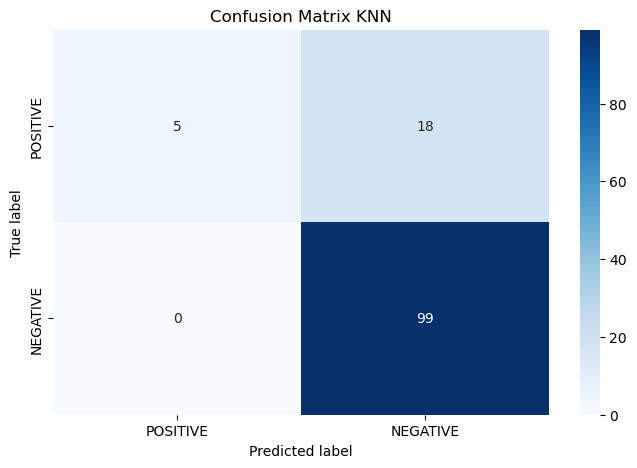

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


knn = KNeighborsClassifier()
knn.fit(X_train,y_train) #Proses latihan
prediction = knn.predict(X_test) #Prediksi bakalan postif atau negatif???

acc_KNN = accuracy_score(y_test,prediction)
prec_KNN = precision_score(y_test,prediction, pos_label = 'POSITIVE')
recall_KNN = recall_score(y_test,prediction, pos_label = 'POSITIVE')
f1Score_KNN = f1_score(y_test,prediction, pos_label = 'POSITIVE')
confusmat_KNN = confusion_matrix(y_test,prediction)

print("Akurasi KNN =", acc_KNN)
print("Precision KNN =", prec_KNN)
print("Recall KNN =", recall_KNN)
print("F1 score KNN =", f1Score_KNN)

plt.figure(figsize=(8,5))
sns.heatmap(confusmat_KNN, annot = True, cmap = 'Blues', xticklabels = data_tweet['label'].unique(), yticklabels = data_tweet['label'].unique())
plt.title('Confusion Matrix KNN')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Naive Bayes

Akurasi NB = 0.8114754098360656
Precision NB = 0.8114754098360656
Recall NB = 1.0
F1 score NB = 0.8959276018099547


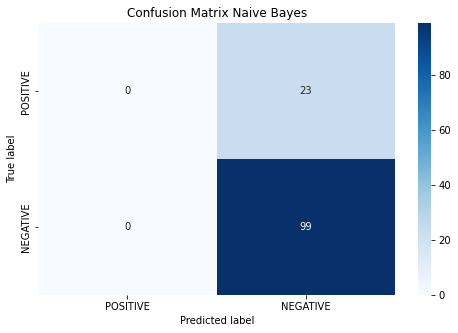

In [ ]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X_train,y_train)
prediction = gnb.predict(X_test)

acc_NB = accuracy_score(y_test,prediction)
prec_NB = precision_score(y_test,prediction, pos_label = 'POSITIVE')
recall_NB = recall_score(y_test,prediction, pos_label = 'POSITIVE')
f1Score_NB = f1_score(y_test,prediction, pos_label = 'POSITIVE')
confusmat_NB = confusion_matrix(y_test,prediction)

print("Akurasi NB =", acc_NB)
print("Precision NB =", prec_NB)
print("Recall NB =", recall_NB)
print("F1 score NB =", f1Score_NB)

plt.figure(figsize=(8,5))
sns.heatmap(confusmat_NB, annot = True, cmap = 'Blues', xticklabels = data_tweet['label'].unique(), yticklabels = data_tweet['label'].unique())
plt.title('Confusion Matrix Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Decision Tree Classifier

Akurasi DT = 0.819672131147541
Precision DT = 0.8532110091743119
Recall DT = 0.9393939393939394
F1 score DT = 0.8942307692307692


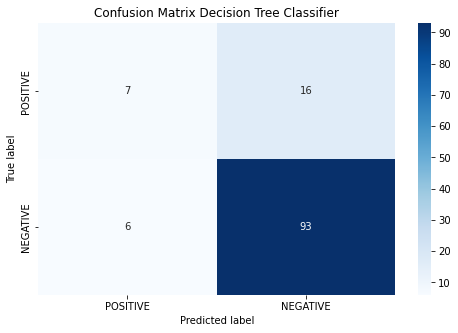

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train, y_train)
prediction = dt.predict(X_test)

acc_DT = accuracy_score(y_test,prediction)
prec_DT = precision_score(y_test,prediction, pos_label = 'POSITIVE')
recall_DT = recall_score(y_test,prediction, pos_label = 'POSITIVE')
f1Score_DT = f1_score(y_test,prediction, pos_label = 'POSITIVE')
confusmat_DT = confusion_matrix(y_test,prediction)

print("Akurasi DT =", acc_DT)
print("Precision DT =", prec_DT)
print("Recall DT =", recall_DT)
print("F1 score DT =", f1Score_DT)

plt.figure(figsize=(8,5))
sns.heatmap(confusmat_DT, annot = True, cmap = 'Blues', xticklabels = data_tweet['label'].unique(), yticklabels = data_tweet['label'].unique())
plt.title('Confusion Matrix Decision Tree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest Classifier

Akurasi RF = 0.8278688524590164
Precision RF = 0.825
Recall RF = 1.0
F1 score RF = 0.9041095890410958


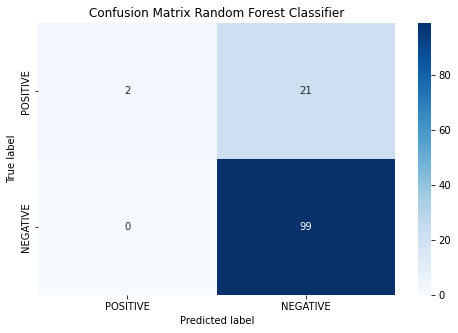

In [ ]:
# Train with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=24)
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)

acc_rf = accuracy_score(y_test,prediction)
prec_rf = precision_score(y_test,prediction, pos_label = 'POSITIVE')
recall_rf = recall_score(y_test,prediction, pos_label = 'POSITIVE')
f1Score_rf = f1_score(y_test,prediction, pos_label = 'POSITIVE')
confusmat_rf = confusion_matrix(y_test,prediction)

print("Akurasi RF =", acc_rf)
print("Precision RF =", prec_rf)
print("Recall RF =", recall_rf)
print("F1 score RF =", f1Score_rf)

plt.figure(figsize=(8,5))
sns.heatmap(confusmat_rf, annot = True, cmap = 'Blues', xticklabels = data_tweet['label'].unique(), yticklabels = data_tweet['label'].unique())
plt.title('Confusion Matrix Random Forest Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Kesimpulan

In [ ]:
hasil = ({'Machine Learning Model':['K-Nearest Neighbors','Naive Bayes','Decision Tree Classifier','Random Forest Classifier'],
         'Accuracy Score':[acc_KNN,acc_NB,acc_DT,acc_rf],
         'Precision Score':[prec_KNN,prec_NB,prec_DT,prec_rf],
         'Recall Score':[recall_KNN,recall_NB,recall_DT,recall_rf],
         'f1 score':[f1Score_KNN,f1Score_NB,f1Score_DT,f1Score_rf]})

df_hasil = pd.DataFrame(hasil)
df_hasil

,Machine Learning Model,Accuracy Score,Precision Score,Recall Score,f1 score
0,K-Nearest Neighbors,0.852459,0.846154,1.000000,0.916667
1,Naive Bayes,0.811475,0.811475,1.000000,0.895928
2,Decision Tree Classifier,0.819672,0.853211,0.939394,0.894231
3,Random Forest Classifier,0.827869,0.825000,1.000000,0.904110
